the r^2 is 0.29376999594622943
the mse is 0.5469561661132973
alcohol                0.561010
volatile acidity       0.230389
free sulfur dioxide    0.208602
dtype: float64


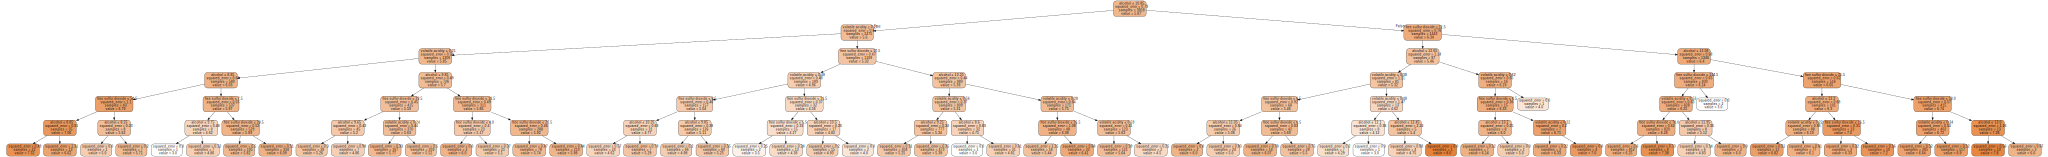

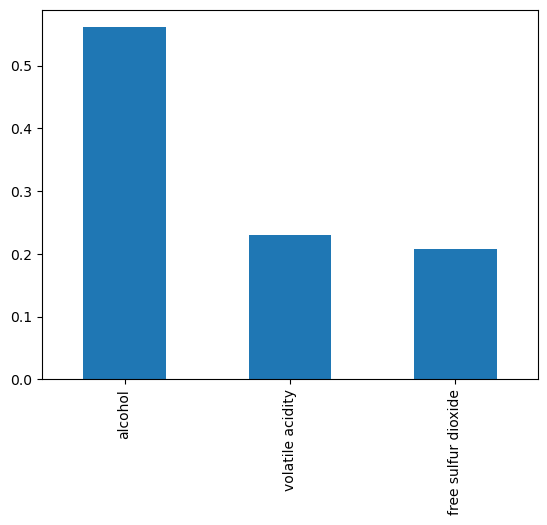

In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import graphviz
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
import sys

# We call the csv data
df = pd.read_csv('../data/raw/winequalityN.csv')
# We fill the NaN numerical values with 0
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

# White wine
dfW = df[df['type'] == 'white'].drop('type',axis =1)


top_Features = ['alcohol', 'volatile acidity', 'free sulfur dioxide']
# Y is our target
y = dfW['quality']
X_drop = dfW.drop('quality', axis=1)

X_reduced = X_drop[top_Features]




# We split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# We call our Class method (Decision Tree) and fit it
Decision = DecisionTreeRegressor(max_depth=6)
Decision.fit(X_train, y_train)

importances_reg = pd.Series(Decision.feature_importances_, index=X_train.columns)
importances_reg.sort_values(ascending=False).plot(kind='bar')

# Prediction
y_pred = Decision.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("the r^2 is", r2)
print("the mse is", mse)
print(importances_reg)




dot_data = tree.export_graphviz(
    Decision, 
    out_file=None, 
    feature_names=top_Features,  
    filled=True, rounded=True,  
    special_characters=True,
    precision=2  
)
graph = graphviz.Source(dot_data) 

graph

Accuracy: 0.5193877551020408

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.33      0.12      0.18        25
           5       0.55      0.56      0.55       291
           6       0.51      0.66      0.58       432
           7       0.51      0.30      0.38       192
           8       0.15      0.06      0.08        35

    accuracy                           0.52       980
   macro avg       0.34      0.28      0.30       980
weighted avg       0.51      0.52      0.50       980

alcohol                0.491056
volatile acidity       0.342663
free sulfur dioxide    0.166281
dtype: float64


c:\Users\Thind\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Thind\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Thind\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


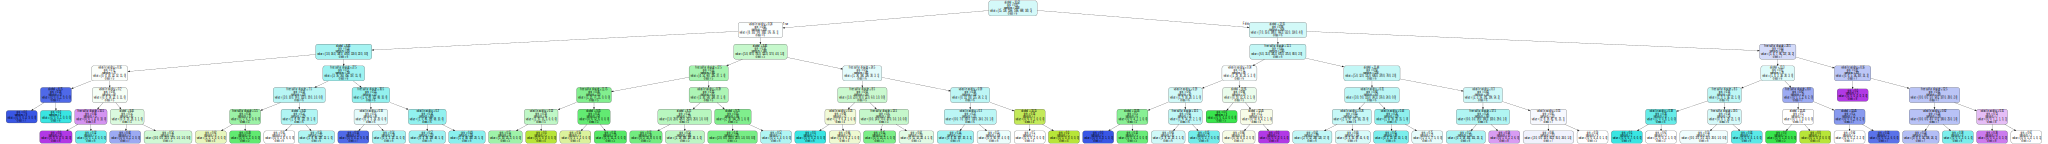

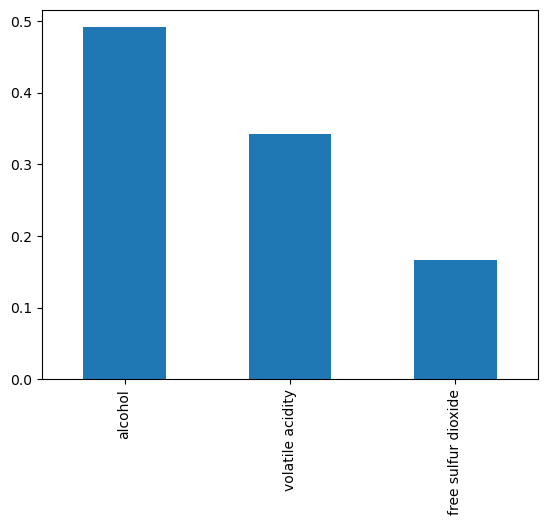

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import graphviz
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.metrics import classification_report

# We call the csv data
df = pd.read_csv('../data/raw/winequalityN.csv')
# We fill the NaN numerical values with 0
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

# White wine
dfW = df[df['type'] == 'white'].drop('type',axis =1)


top_Features = ['alcohol', 'volatile acidity', 'free sulfur dioxide']
# Y is our target
y = dfW['quality']
X_drop = dfW.drop('quality', axis=1)

X_reduced = X_drop[top_Features]




# We split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# We call our Class method (Decision Tree) and fit it
Decision = DecisionTreeClassifier(max_depth=6)
Decision.fit(X_train, y_train)

importances_cls = pd.Series(Decision.feature_importances_, index=X_train.columns)
importances_cls.sort_values(ascending=False).plot(kind='bar')

# Prediction
y_pred = Decision.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(importances_cls)




dot_data = tree.export_graphviz(
    Decision, 
    out_file=None, 
    feature_names=top_Features,  
    class_names=[str(i) for i in sorted(y.unique())],  
    filled=True, rounded=True,  
    special_characters=True,
    precision=2  
)
graph = graphviz.Source(dot_data)

graph